In [2]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

/home/wyz5rge/.local/lib/python3.9/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /scratch/wyz5rge/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))


## Set up parameters, create isochrone grid

In [3]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.Baraffe15()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F200W']
filters = ['m_jwst_F115W', 'm_jwst_F200W']
iso_dir = 'isochrones/'
metallicity = 0

In [7]:
increment = 0.5e6

start = 0.5e6
end = 2.05e7

# Create age arrays
level_age_arr = np.arange(start, end, increment)
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[5.69897    6.         6.17609126 6.30103    6.39794001 6.47712125
 6.54406804 6.60205999 6.65321251 6.69897    6.74036269 6.77815125
 6.81291336 6.84509804 6.87506126 6.90308999 6.92941893 6.95424251
 6.97772361 7.         7.0211893  7.04139269 7.06069784 7.07918125
 7.09691001 7.11394335 7.13033377 7.14612804 7.161368   7.17609126
 7.1903317  7.20411998 7.21748394 7.23044892 7.24303805 7.25527251
 7.26717173 7.2787536  7.29003461 7.30103   ]
[  500000.  1000000.  1500000.  2000000.  2500000.  3000000.  3500000.
  4000000.  4500000.  5000000.  5500000.  6000000.  6500000.  7000000.
  7500000.  8000000.  8500000.  9000000.  9500000. 10000000. 10500000.
 11000000. 11500000. 12000000. 12500000. 13000000. 13500000. 14000000.
 14500000. 15000000. 15500000. 16000000. 16500000. 17000000. 17500000.
 18000000. 18500000. 19000000. 19500000. 20000000.]


In [8]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

Isochrone generation took 1.140975 s.
Making photometry for isochrone: log(t) = 6.40  AKs = 0.00  dist = 410
     Starting at:  2024-05-09 21:45:29.835808   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2189 K  m_jwst_F115W = 18.67
Starting filter: jwst,F200W   Elapsed time: 0.73 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2189 K  m_jwst_F200W = 17.71
      Time taken: 1.27 seconds
Isochrone generation took 1.195662 s.
Making photometry for isochrone: log(t) = 6.48  AKs = 0.00  dist = 410
     Starting at:  2024-05-09 21:45:32.319021   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2143 K  m_jwst_F115W = 18.86
Starting filter: jwst,F200W   Elapsed time: 0.56 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  2143 K  m_jwst_F200W = 17.88
      Time taken: 1.17 seconds
Isochrone generati

      Time taken: 1.18 seconds
Changing to logg=5.00 for T=  1552 logg=4.05
Isochrone generation took 1.106484 s.
Making photometry for isochrone: log(t) = 7.02  AKs = 0.00  dist = 410
     Starting at:  2024-05-09 21:46:07.470174   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1552 K  m_jwst_F115W = 21.79
Starting filter: jwst,F200W   Elapsed time: 0.63 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1552 K  m_jwst_F200W = 19.56
      Time taken: 1.29 seconds
Changing to logg=5.00 for T=  1532 logg=4.06
Isochrone generation took 1.116056 s.
Making photometry for isochrone: log(t) = 7.04  AKs = 0.00  dist = 410
     Starting at:  2024-05-09 21:46:09.886470   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1532 K  m_jwst_F115W = 21.77
Starting filter: jwst,F200W   Elapsed time: 0.69 seconds
Starting s

Starting filter: jwst,F200W   Elapsed time: 0.55 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1414 K  m_jwst_F200W = 20.10
      Time taken: 1.20 seconds
Isochrone generation took 1.109845 s.
Making photometry for isochrone: log(t) = 7.28  AKs = 0.00  dist = 410
     Starting at:  2024-05-09 21:46:47.635744   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1408 K  m_jwst_F115W = 22.17
Starting filter: jwst,F200W   Elapsed time: 0.69 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1408 K  m_jwst_F200W = 20.13
      Time taken: 1.36 seconds
Isochrone generation took 1.116940 s.
Making photometry for isochrone: log(t) = 7.29  AKs = 0.00  dist = 410
     Starting at:  2024-05-09 21:46:50.123811   Usually takes ~5 minutes
Starting filter: jwst,F115W   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.010 Msun  T =  1397 K  m_jwst_F115W = 22.18
Starting filter: j

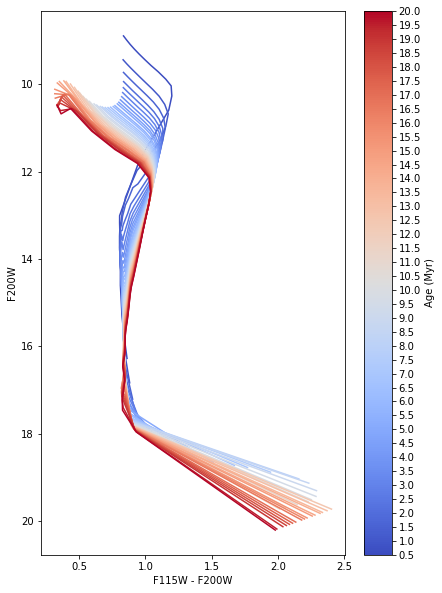

In [24]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))

# define a colormap
cmap = plt.get_cmap('coolwarm')

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)

for i in range(len(log_age_arr)):
    color = cmap(i / (len(log_age_arr) - 1))  # Assign color based on index and colormap
    py.plot(instances[i].points[filters[0]] - instances[i].points[filters[1]], 
           instances[i].points[filters[1]], color=color, label=level_age_arr[i])
    
py.xlabel('F115W - F200W')
py.ylabel('F200W')
py.gca().invert_yaxis()

norm = Normalize(vmin=min(level_age_arr), vmax=max(level_age_arr))
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Age (Myr)')
cbar.set_ticks(level_age_arr)
cbar.set_ticklabels([f'{age/1e6:.1f}' for age in level_age_arr])

py.show()